In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import torch

import scSLAT
from scSLAT.model import run_SLAT_multi,load_anndatas, Cal_Spatial_Net, run_SLAT, scanpy_workflow, spatial_match
from scSLAT.viz import match_3D_multi, build_3D, hist, Sankey, match_3D_celltype
from scSLAT.metrics import region_statistics

In [3]:
sc.set_figure_params(dpi=150, dpi_save=150)

In [4]:
adata1 = sc.read_h5ad('../seqFISH_filer.h5ad')
adata2 = sc.read_h5ad('../Stereo_filer.h5ad')

In [5]:
embd0 = pd.read_csv('./seurat_embd0.csv')
embd1 = pd.read_csv('./seurat_embd1.csv')
embd0 = torch.from_numpy(embd0.to_numpy())
embd1 = torch.from_numpy(embd1.to_numpy())

In [6]:
best, index, distance = spatial_match([embd0, embd1], reorder=False)
matching = np.array([range(index.shape[0]), best])

In [9]:
adata1_df = pd.DataFrame({'index':range(embd0.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype':adata1.obs['celltype_mapped_refined']})
adata2_df = pd.DataFrame({'index':range(embd1.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype':adata2.obs['annotation']})
matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]
region_statistics(best_match, start=0.5, number_of_interval=10)

0.500~0.550         6          0.119%
0.550~0.600        27          0.537%
0.600~0.650       113          2.246%
0.650~0.700       291          5.784%
0.700~0.750       549         10.912%
0.750~0.800       937         18.625%
0.800~0.850      1611         32.021%
0.850~0.900      1249         24.826%
0.900~0.950       246          4.890%
0.950~1.000         1          0.020%


/rd2/user/xiacr/SLAT/scSLAT/viz/multi_dataset.py:204: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 21 cell types; dataset2: 11 cell types; 
                    Total :29 celltypes; Overlap: 3 cell types 
                    Not overlap :[['Blood progenitors', 'Anterior somitic tissues', 'Splanchnic mesoderm', 'Surface ectoderm', 'Cranial mesoderm', 'ExE endoderm', 'Erythroid', 'Allantois', 'Mixed mesenchymal mesoderm', 'Haematoendothelial progenitors', 'NMP', 'Lateral plate mesoderm', 'Endothelium', 'Definitive endoderm', 'Forebrain/Midbrain/Hindbrain', 'Presomitic mesoderm', 'Intermediate mesoderm', 'Cardiomyocytes', 'Heart', 'Branchial arch', 'Mesenchyme', 'Liver', 'AGM', 'Connective tissue', 'Notochord', 'Brain']]
Subsample 300 cell pairs from 5031


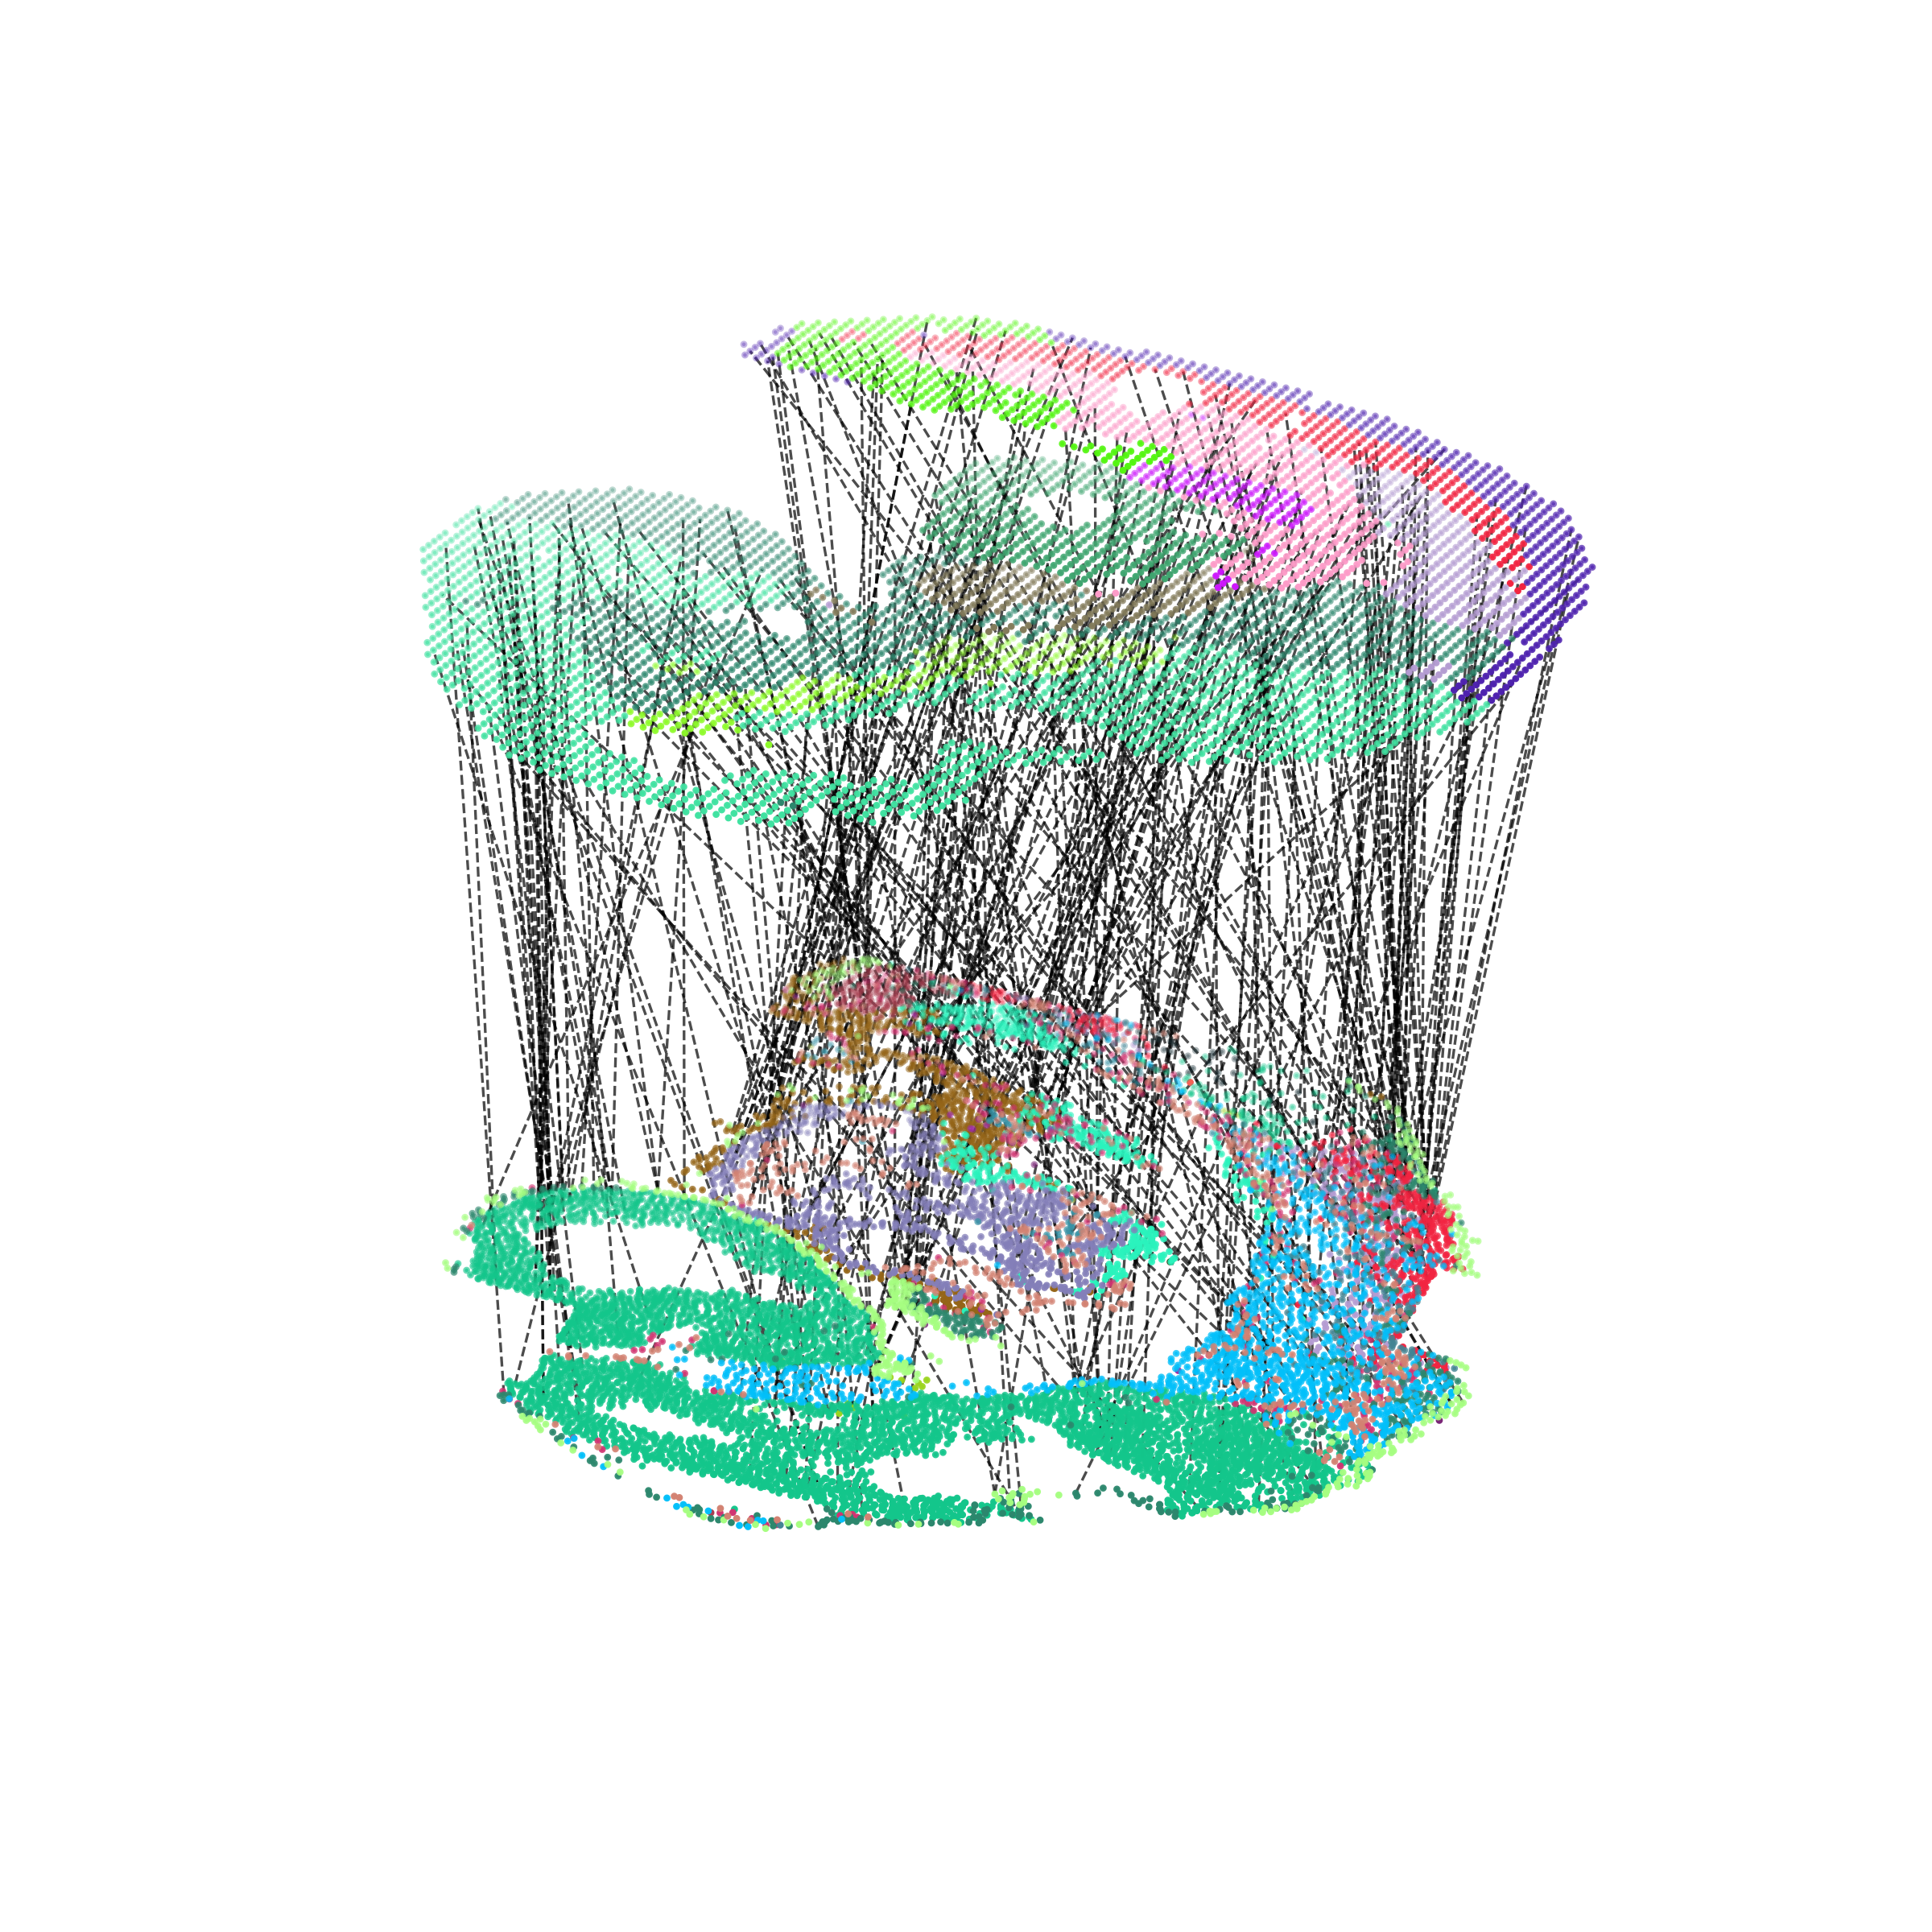

In [10]:
all_match = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                              scale_coordinate=True, subsample_size=300)

all_match.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.2, 1.2],
                  line_color='black', show_error=False, hide_axis=True)

/rd2/user/xiacr/SLAT/scSLAT/viz/multi_dataset.py:204: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 21 cell types; dataset2: 11 cell types; 
                    Total :29 celltypes; Overlap: 3 cell types 
                    Not overlap :[['Blood progenitors', 'Anterior somitic tissues', 'Splanchnic mesoderm', 'Surface ectoderm', 'Cranial mesoderm', 'ExE endoderm', 'Erythroid', 'Allantois', 'Mixed mesenchymal mesoderm', 'Haematoendothelial progenitors', 'NMP', 'Lateral plate mesoderm', 'Endothelium', 'Definitive endoderm', 'Forebrain/Midbrain/Hindbrain', 'Presomitic mesoderm', 'Intermediate mesoderm', 'Cardiomyocytes', 'Heart', 'Branchial arch', 'Mesenchyme', 'Liver', 'AGM', 'Connective tissue', 'Notochord', 'Brain']]
Subsample 3000 cell pairs from 4593


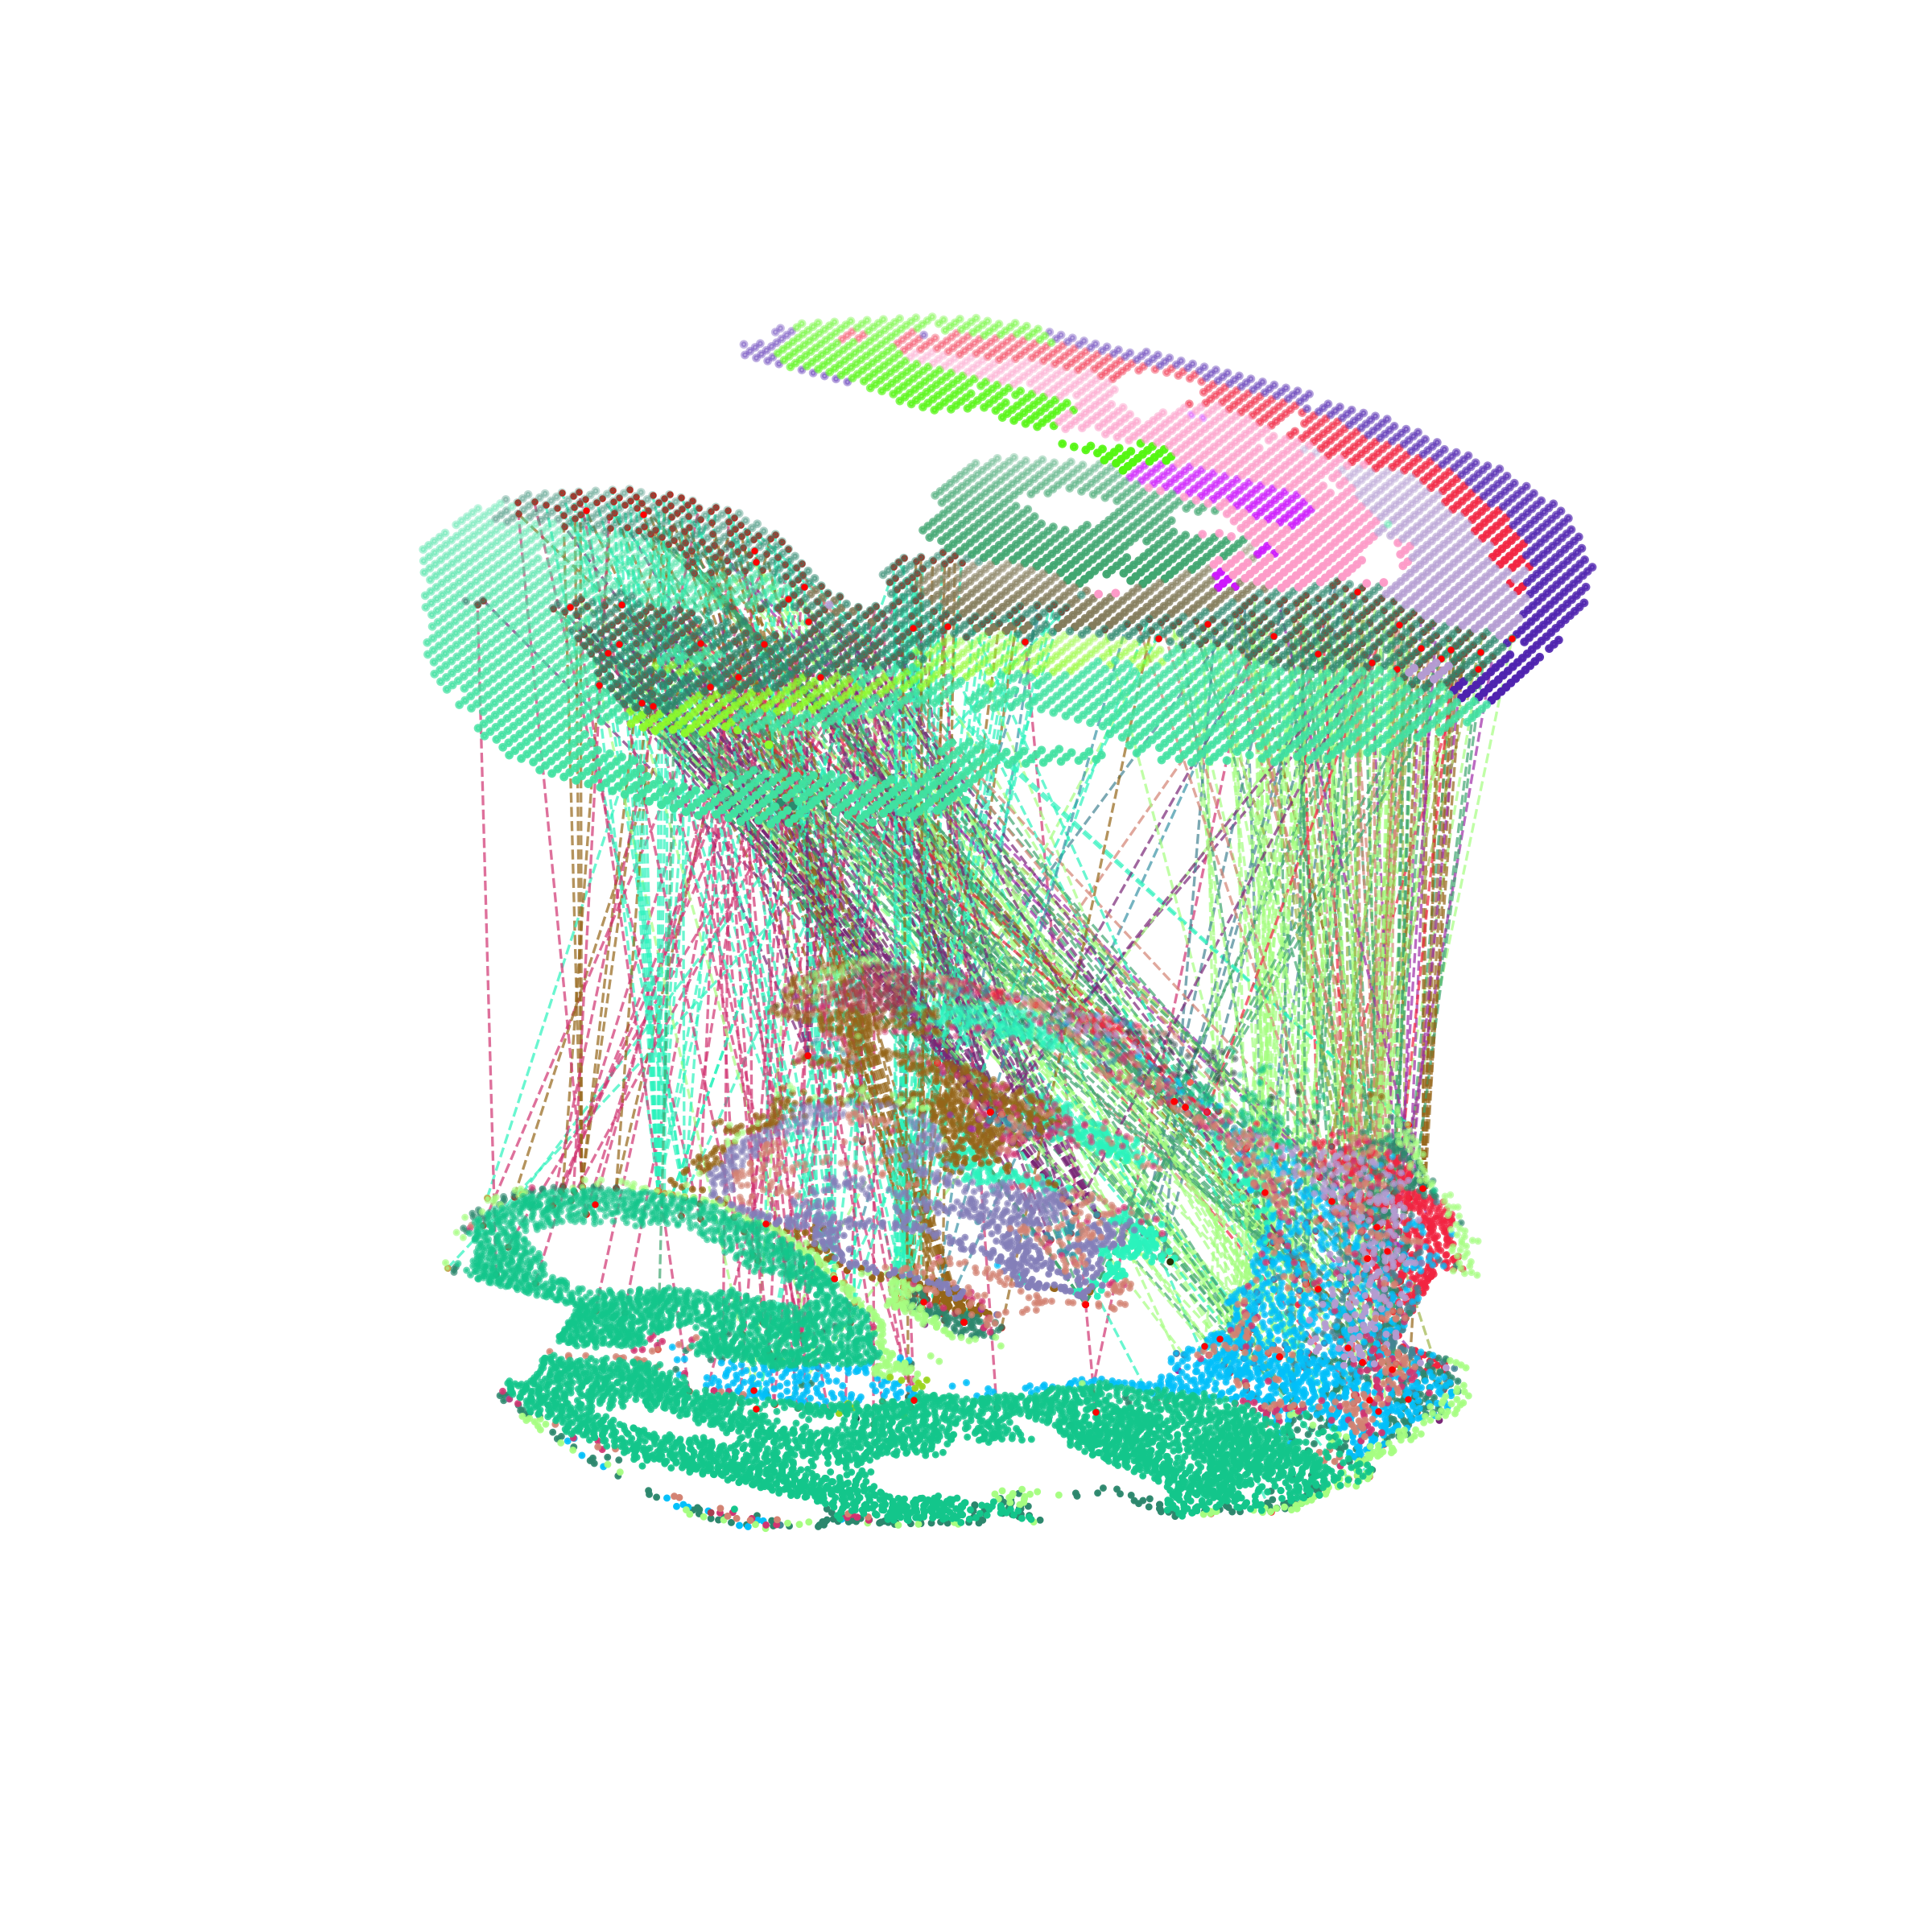

In [11]:
test = match_3D_celltype(adata1_df, adata2_df, matching[:, best_match > 0.7], meta='celltype', highlight_celltype=[list(set(adata1_df.celltype)),['Neural crest']],
                         subsample_size=3000, highlight_cell=['red'], scale_coordinate=True)
test.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.25,2.5], hide_axis=True)